## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## Loading the cleaned dataset

In [44]:
df = pd.read_csv('df_cleaned_2.csv')

In [45]:
df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# assume df is your dataframe with all features
X = df.drop(columns=['id'])

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA()
pca.fit(X_scaled)

# calculate explained variance ratio for each principal component
explained_variances = pca.explained_variance_ratio_

# choose number of principal components to keep based on explained variance
total_var = 0.0
n_components = 0
for i, explained_var in enumerate(explained_variances):
    total_var += explained_var
    if total_var >= 0.95:
        n_components = i + 1
        break

# fit PCA with chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# extract feature names corresponding to selected principal components
pc_names = []
for i in range(n_components):
    pc_names.append('PC{}'.format(i+1))
    
# create new dataframe with selected principal components
df_pca = pd.DataFrame(data=X_pca, columns=pc_names)

# join id column back to the dataframe
df_pca['id'] = df['id']

In [30]:
df = df_pca

## Scaling features

In [31]:
X = df.drop(columns=['id'])

In [32]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.669817,-0.658234,-0.059614,0.118175,-0.981292,1.021232,0.391480,0.193994
1,-1.373356,-1.020625,-0.949284,-0.145341,0.046685,-0.242477,0.195320,0.023502
2,-0.810712,-0.524887,-0.470797,0.806540,-0.443665,-0.734807,-0.779798,-0.001148
3,-0.413005,-0.116285,-0.181084,0.379724,0.692622,-1.452238,-0.078763,0.084681
4,-0.050569,-0.644328,-0.520703,0.338099,0.040460,-1.194976,-0.260888,-1.037182
...,...,...,...,...,...,...,...,...
13084,4.708629,-0.222804,-0.248497,0.841810,0.794439,-0.083391,-0.267008,0.579964
13085,3.028452,0.063580,0.415856,-0.874861,-0.671918,-0.790412,1.235727,-0.769395
13086,3.784242,0.692179,0.105798,0.717921,0.530246,0.645307,-0.270077,0.182474
13087,2.859544,-1.678536,0.485926,0.556259,-0.741367,-1.070756,0.628771,-0.353880


## Chosing K

## Silouhette

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

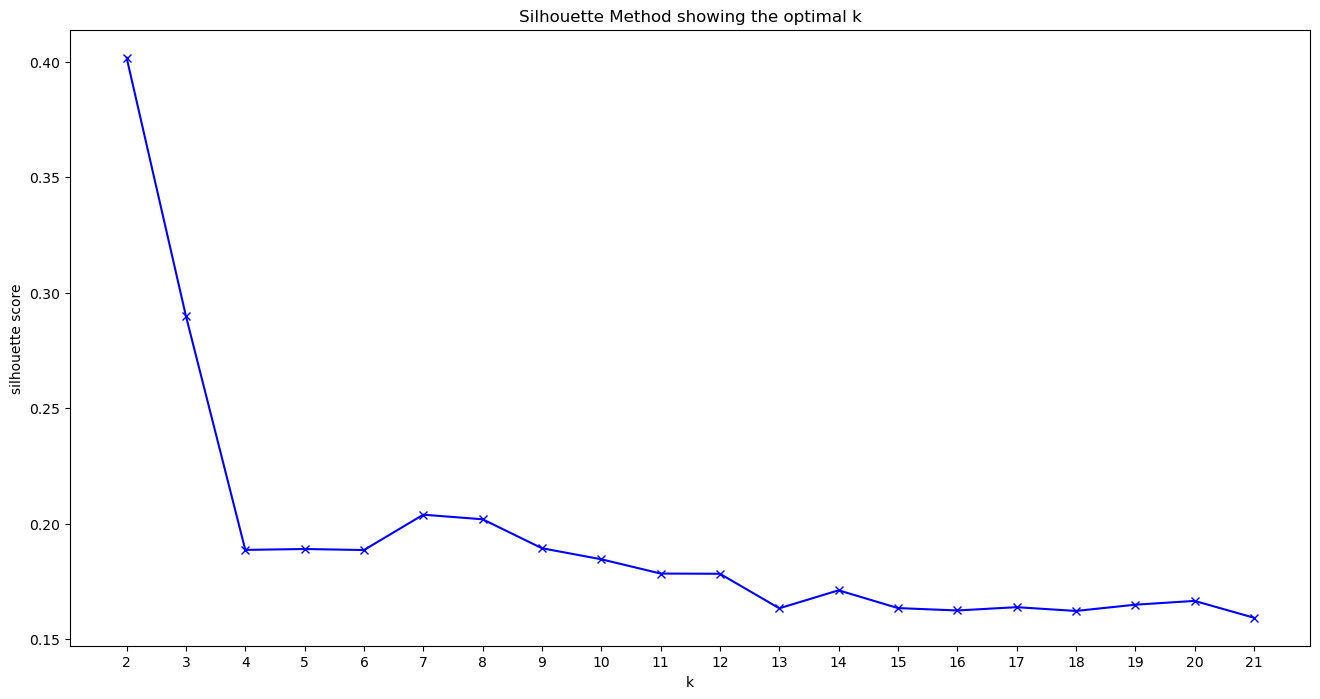

In [33]:
K = range(2, 22)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

## Clustering the songs with K-Means

In [34]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X)

KMeans(random_state=1234)

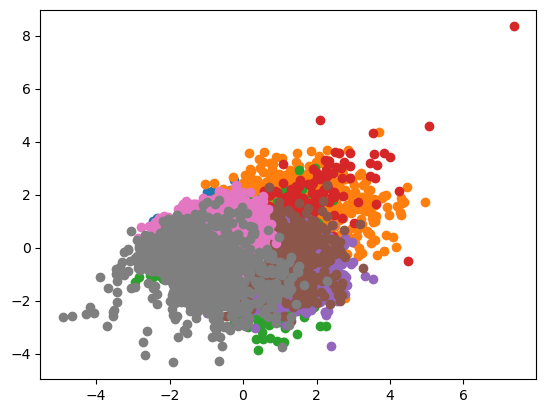

In [35]:
# assign a cluster to each example
labels = kmeans.predict(X)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [36]:
clusters = kmeans.predict(X)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    2237
1     855
2    1801
3     378
4    2362
5    1341
6    3225
7     890
dtype: int64

Now let's see to which group was assigned every song.

In [37]:
#X_df = pd.DataFrame(X)
df["cluster"] = clusters

In [38]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,id,cluster
0,-1.669817,-0.658234,-0.059614,0.118175,-0.981292,1.021232,0.391480,0.193994,6AQbmUe0Qwf5PZnt4HmTXv,6
1,-1.373356,-1.020625,-0.949284,-0.145341,0.046685,-0.242477,0.195320,0.023502,0yLdNVWF3Srea0uzk55zFn,6
2,-0.810712,-0.524887,-0.470797,0.806540,-0.443665,-0.734807,-0.779798,-0.001148,1Qrg8KqiBpW07V7PNxwwwL,0
3,-0.413005,-0.116285,-0.181084,0.379724,0.692622,-1.452238,-0.078763,0.084681,5Z2MiIZ5I3jJvvmeWMLbOQ,0
4,-0.050569,-0.644328,-0.520703,0.338099,0.040460,-1.194976,-0.260888,-1.037182,2dHHgzDwk4BJdRwy9uXhTO,0
...,...,...,...,...,...,...,...,...,...,...
13084,4.708629,-0.222804,-0.248497,0.841810,0.794439,-0.083391,-0.267008,0.579964,2IAnU53rak76TpGpA515Xl,2
13085,3.028452,0.063580,0.415856,-0.874861,-0.671918,-0.790412,1.235727,-0.769395,4zPZbj1sNxCOtU1CdgCK53,2
13086,3.784242,0.692179,0.105798,0.717921,0.530246,0.645307,-0.270077,0.182474,2qYu0I9yKKpGnbySmN6w3K,2
13087,2.859544,-1.678536,0.485926,0.556259,-0.741367,-1.070756,0.628771,-0.353880,1xU1yjwGAGCCE3RiB8YKLe,2


## Playing with the parameters

In [39]:
kmeans.inertia_

49964.552951687205

# Saving with pickle

In [40]:
df.to_csv('test_PCA2.csv', index=False)

In [41]:
# Save both objects together
with open("test_PCA2.pkl", "wb") as f:
    pickle.dump((scaler, kmeans, pca), f)